# QUESTION-Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [2]:
pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla1.xlsb to ToyotaCorolla1.xlsb


In [4]:
car=pd.read_excel('ToyotaCorolla1.xlsb',engine='pyxlsb')

In [ ]:
car

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# removing the column which is not required according to the question
toy=pd.concat([car.iloc[:,2:4],car.iloc[:,6:7],car.iloc[:,8:9],car.iloc[:,12:14],car.iloc[:,15:18]],axis=1)
toy

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
# checking for datatype
toy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [7]:
# check for missing value
toy.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
# Renaming the column
toy=toy.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)

Checking for duplicate values

In [9]:
toy[toy.duplicated()].shape

(1, 9)

In [10]:
toy[toy.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
#Hence, we dropped those values
toy=toy.drop_duplicates().reset_index(drop=True)
toy[toy.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight



Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [12]:
discrete_feature=[feature for feature in toy.columns if len(toy[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [13]:
continuous_feature=[feature for feature in toy.columns if toy[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


Exploratory Data Anlaysis

In [14]:
import pylab
def plot_toy(toy,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    toy[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(toy[feature],dist='norm',plot=pylab)

Text(0.5, 1.0, 'Weight')

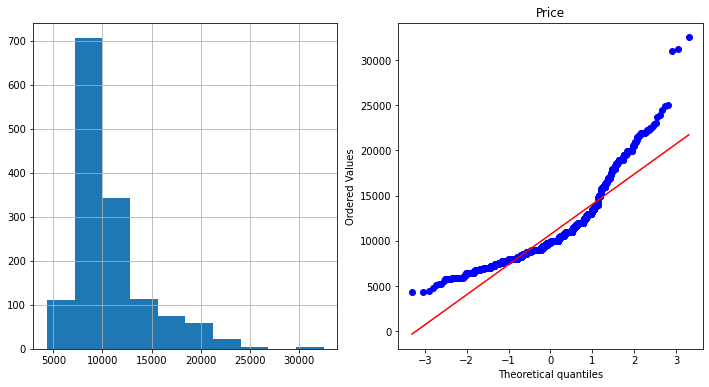

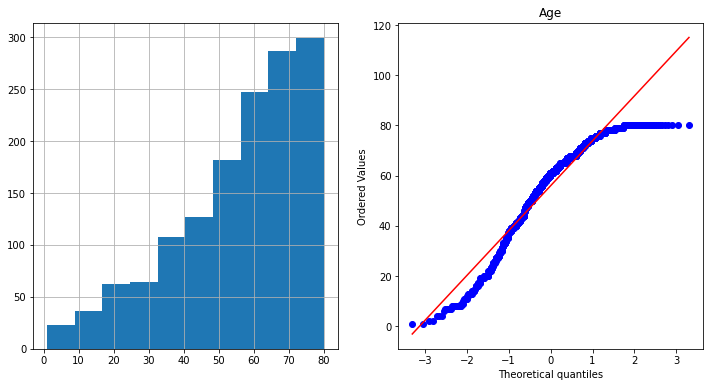

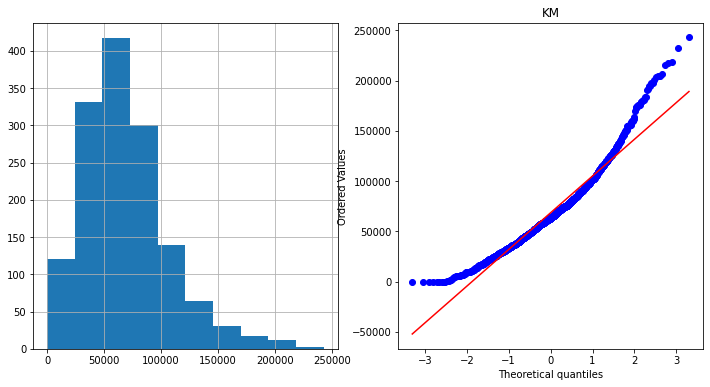

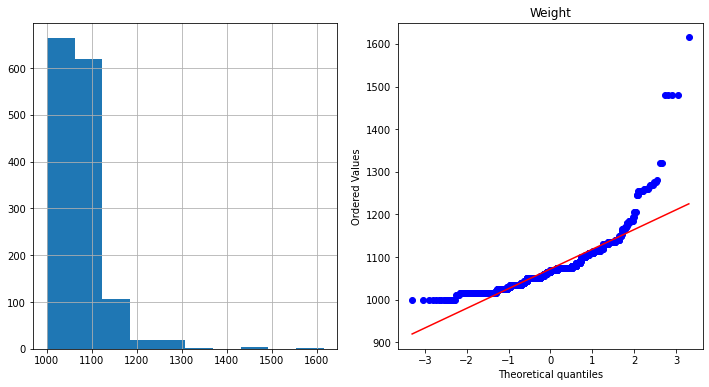

In [15]:
plot_toy(toy,'Price')
plt.title('Price')
plot_toy(toy,'Age')
plt.title('Age')
plot_toy(toy,'KM')
plt.title('KM')
plot_toy(toy,'Weight')
plt.title('Weight')

Text(0.5, 1.0, 'Weight')

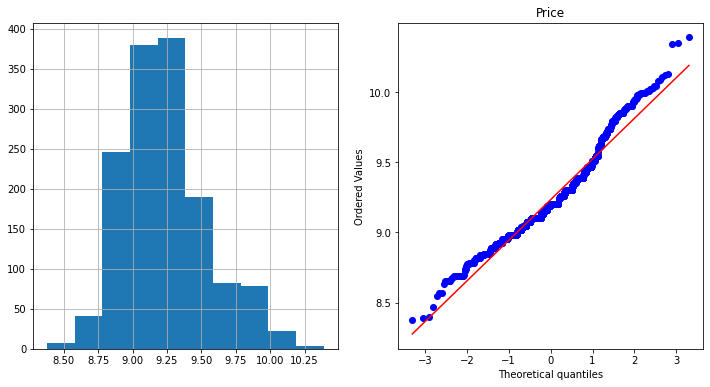

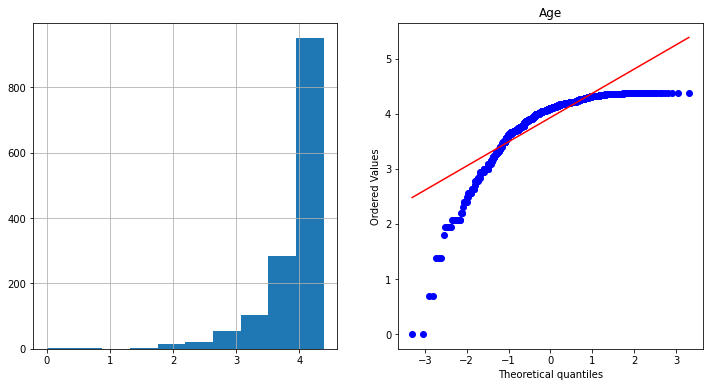

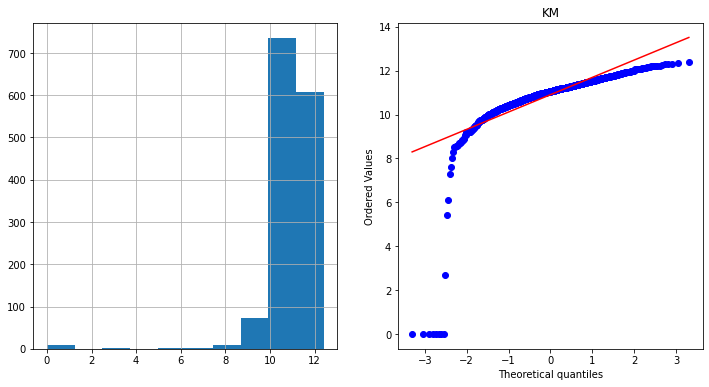

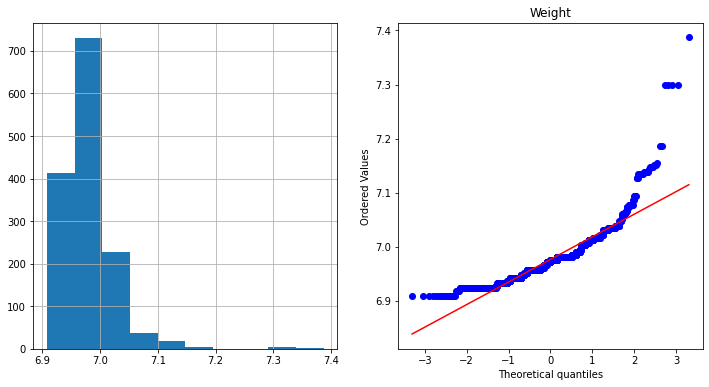

In [16]:
#Log transformation and visualizing the Histogram to determine any possible changes in distribution
df=toy.copy()
df[continuous_feature]=np.log(df[continuous_feature])

plot_toy(df,'Price')
plt.title('Price')
plot_toy(df,'Age')
plt.title('Age')
plot_toy(df,'KM')
plt.title('KM')
plot_toy(df,'Weight')
plt.title('Weight')

Square root transformation and visualizing the Histogram to determine any possible changes in distributio

Text(0.5, 1.0, 'Weight')

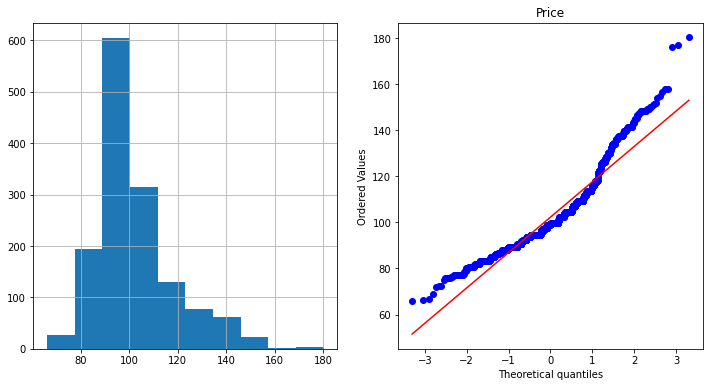

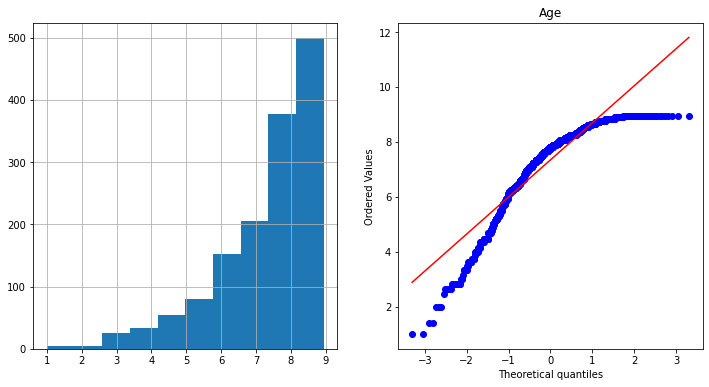

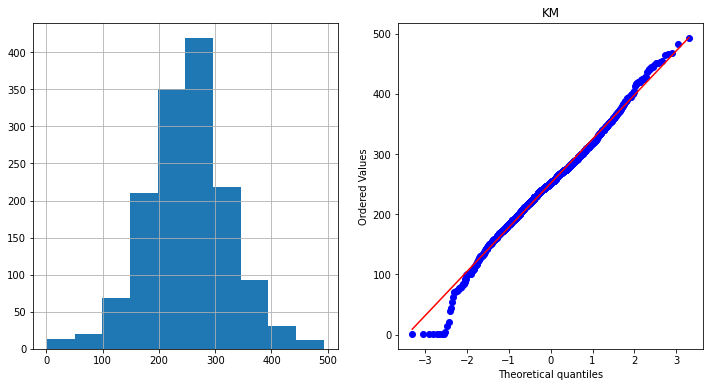

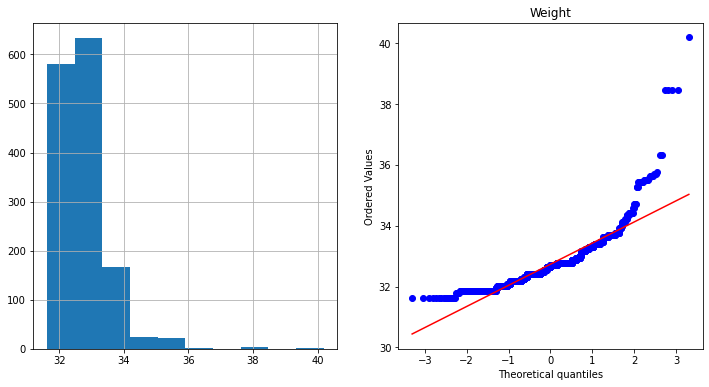

In [17]:
df=toy.copy()
df[continuous_feature]=np.sqrt(df[continuous_feature])

plot_toy(df,'Price')
plt.title('Price')
plot_toy(df,'Age')
plt.title('Age')
plot_toy(df,'KM')
plt.title('KM')
plot_toy(df,'Weight')
plt.title('Weight')

In [ ]:
#Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

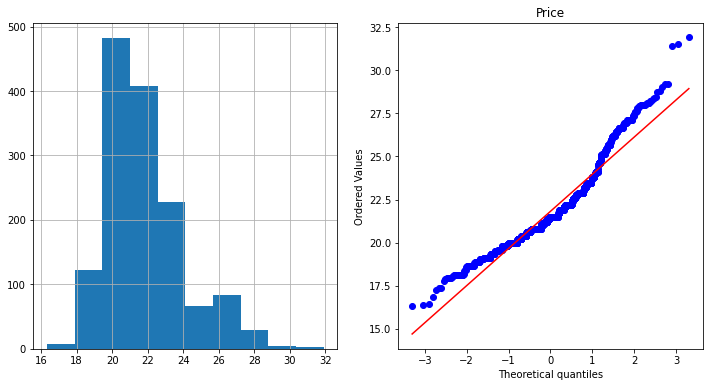

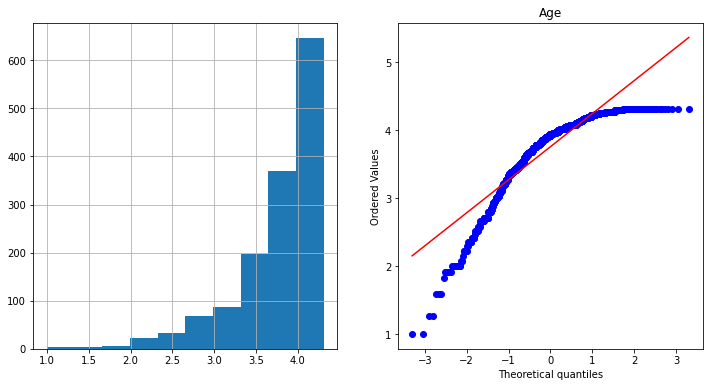

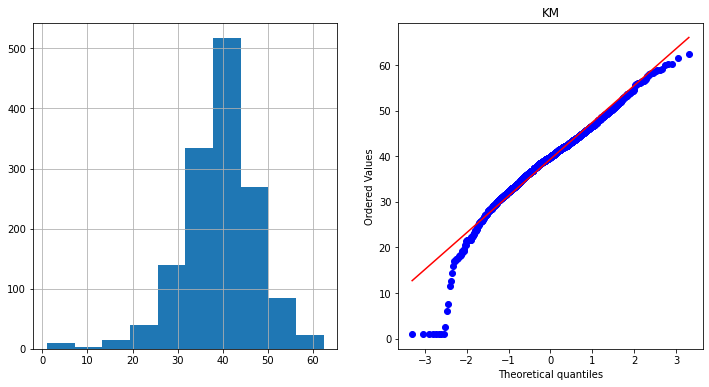

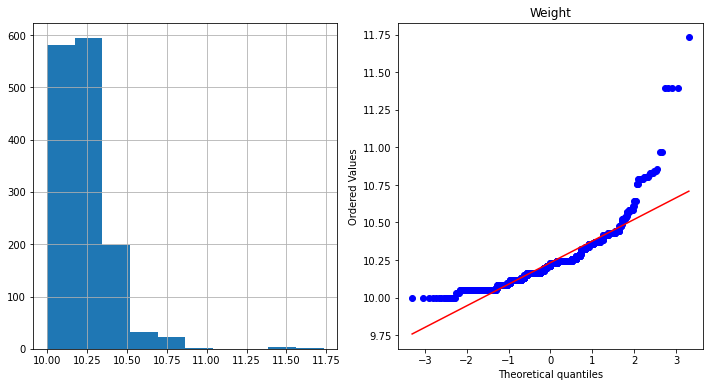

In [18]:
df=toy.copy()
df[continuous_feature]=np.cbrt(df[continuous_feature])

plot_toy(df,'Price')
plt.title('Price')
plot_toy(df,'Age')
plt.title('Age')
plot_toy(df,'KM')
plt.title('KM')
plot_toy(df,'Weight')
plt.title('Weight')

CORRELATION MATRIX


In [19]:
df.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.883606,-0.653888,0.315470,0.112143,0.188258,0.066472,0.187170,0.534532
Age,-0.883606,1.000000,0.637758,-0.154006,-0.093646,-0.154224,0.003968,-0.191501,-0.503866
KM,-0.653888,0.637758,1.000000,-0.275897,0.060194,-0.061923,0.023179,0.200611,-0.135904
HP,0.315470,-0.154006,-0.275897,1.000000,0.035207,0.091803,0.209642,-0.302287,0.091569
CC,0.112143,-0.093646,0.060194,0.035207,1.000000,0.079254,0.014732,0.305982,0.342812
Doors,0.188258,-0.154224,-0.061923,0.091803,0.079254,1.000000,-0.160101,0.107353,0.313341
Gears,0.066472,0.003968,0.023179,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.022370
QT,0.187170,-0.191501,0.200611,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.626623
Weight,0.534532,-0.503866,-0.135904,0.091569,0.342812,0.313341,0.022370,0.626623,1.000000


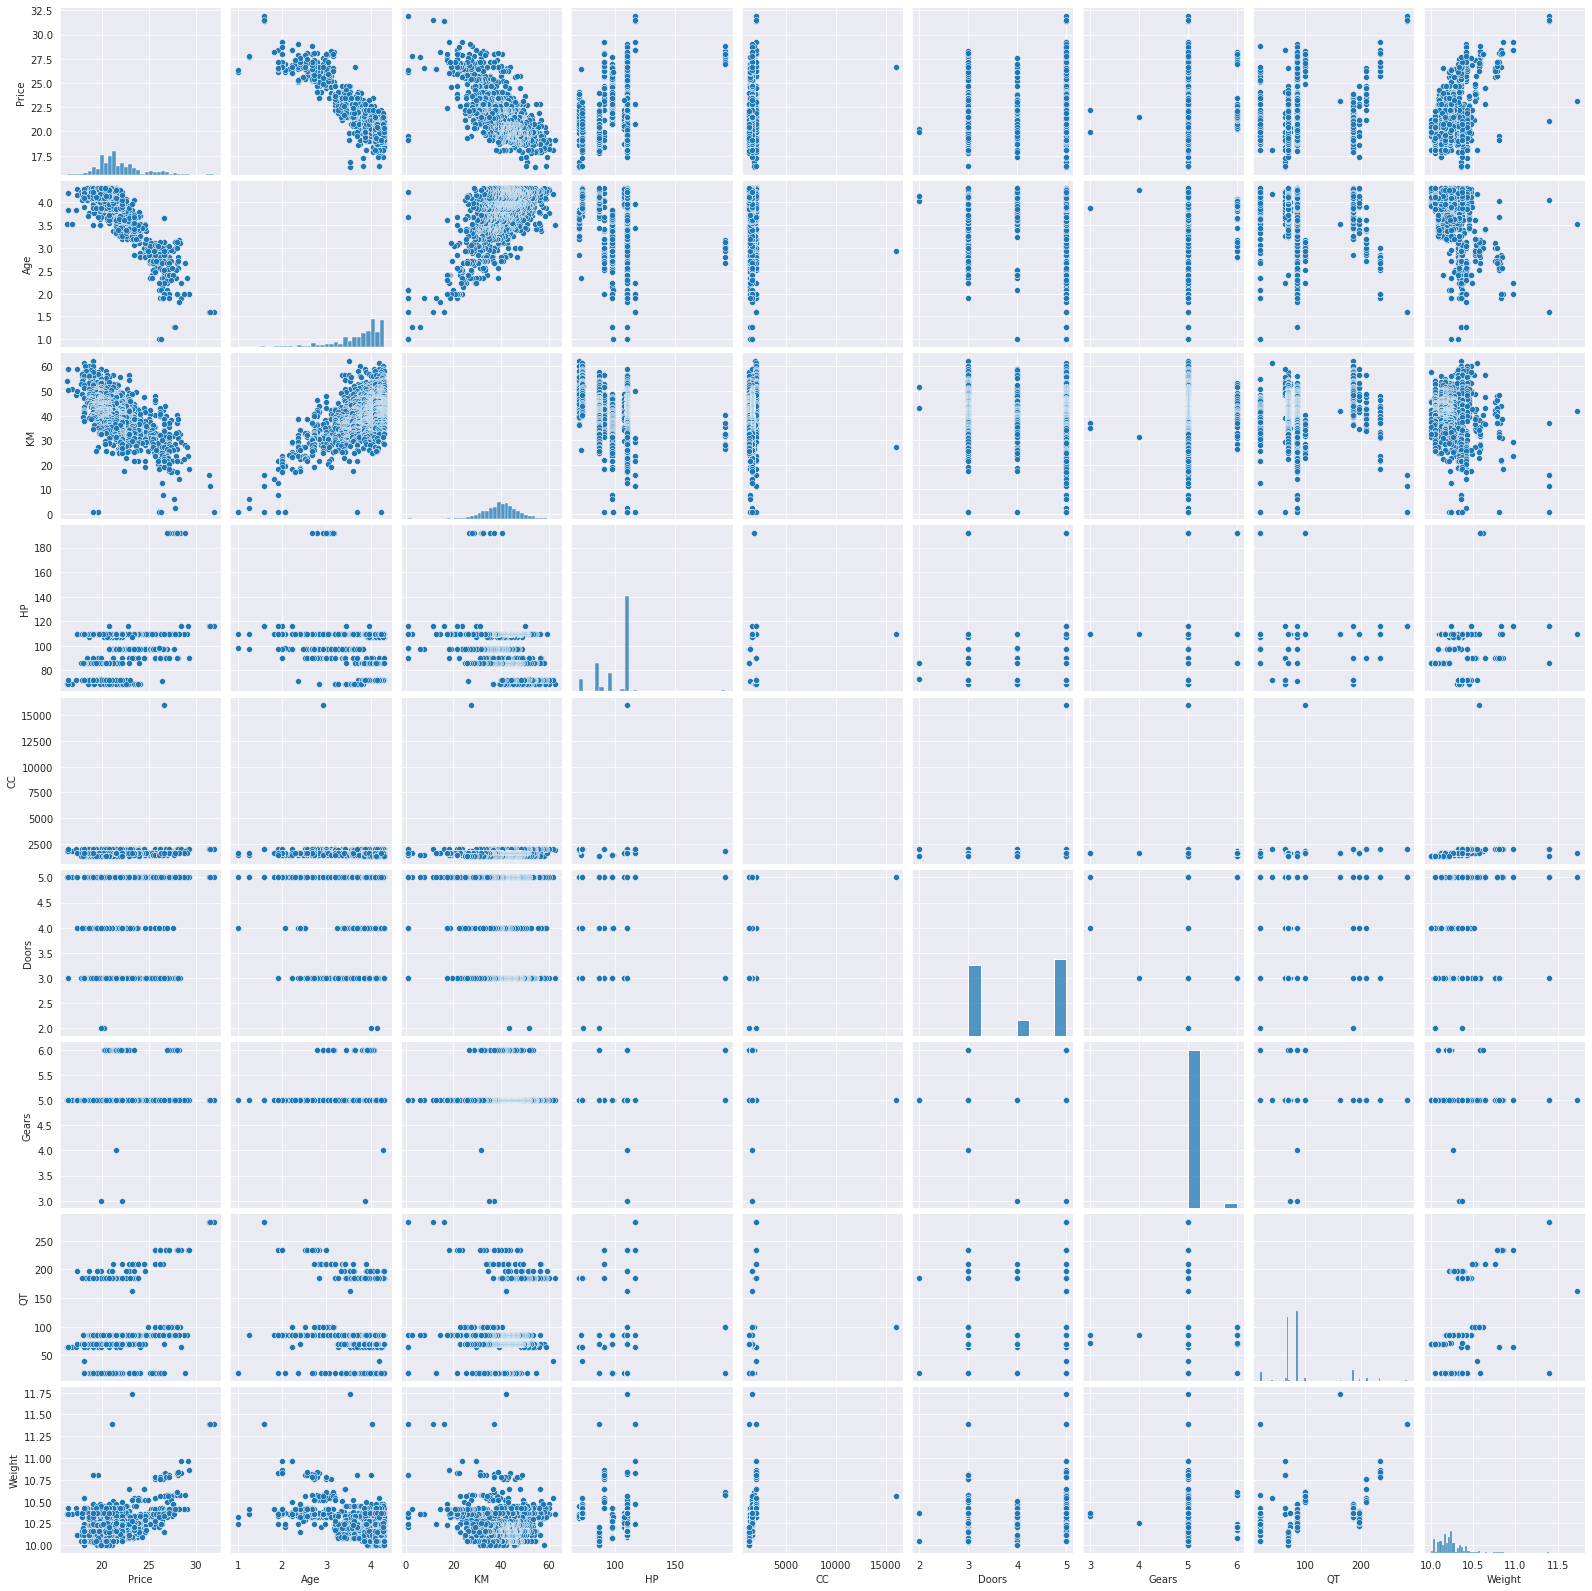

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

Preparing the model

In [21]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [22]:
# Coefficients
model.params

Intercept    15.414846
Age          -2.846725
KM           -0.048581
HP            0.025093
CC           -0.000038
Doors         0.060591
Gears         0.480570
QT            0.004647
Weight        1.315403
dtype: float64

In [23]:
#t and p-Values
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept     6.079763
Age         -41.106809
KM          -11.705248
HP           13.528383
CC           -0.639195
Doors         2.264743
Gears         3.669146
QT            5.260588
Weight        5.380255
dtype: float64 
 Intercept    0.00000
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.52280
Doors        0.02368
Gears        0.00025
QT           0.00000
Weight       0.00000
dtype: float64


In [24]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8410402006630662, 0.8401484205826346)

Feature Engineering

In [25]:
#Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

#Log-Transformation
df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(df.Age)
df_log_scaled['Price'] = np.log(df.Price)
df_log_scaled['KM'] = np.log(df.KM)
df_log_scaled['Weight'] = np.log(df.Weight)
df_log_scaled['CC'] = df['CC']
df_log_scaled['Doors'] = df['Doors']
df_log_scaled['HP'] = df['HP']
df_log_scaled.head()

,Age,Price,KM,Weight,CC,Doors,HP
0,1.045165,3.170148,3.585868,2.353492,2000,3,90
1,1.045165,3.176265,3.732450,2.353492,2000,3,90
2,1.059351,3.181078,3.546173,2.353492,2000,3,90
3,1.086032,3.204156,3.592985,2.353492,2000,3,90
4,1.133732,3.176265,3.519471,2.354920,2000,3,90


In [26]:
log_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Weight", data = df_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     699.7
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:46:25   Log-Likelihood:                 2274.6
No. Observations:                1435   AIC:                            -4535.
Df Residuals:                    1428   BIC:                            -4498.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9302      0.262      7.359      0.000       1.416       2.445
Age           -0.4579      0.012    -39.429      0.000      -0.481      -0.435
KM             0.0172      0.005      3.527      0.000       0.008       0.027
HP             0.0013   8.93e-05     14.647      0.000       0.001       0.001
CC          -2.15e-06   3.32e-06     -0.647      0.517   -8.66e-06    4.36e-06
Doors          0.0021      0.001      1.443      0.149      -0.001       0.005
Weight         0.6654      0.112      5.933      0.000       0.445       0.885
==============================================================================
Omnibus:                      423.490   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2263.347
Skew:                          -1.273   Prob(JB):                         0.00
Kurtosis:                       8.601   Cond. No.                     3.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Cube-Root Transformation
df_cbrt_scaled = pd.DataFrame()
df_cbrt_scaled['Age'] = np.cbrt(toy.Age)
df_cbrt_scaled['Price'] = np.cbrt(toy.Price)
df_cbrt_scaled['KM'] = np.cbrt(toy.KM)
df_cbrt_scaled['Weight'] = np.cbrt(toy.Weight)
df_cbrt_scaled['CC'] = toy['CC']
df_cbrt_scaled['QT'] = toy['QT']
df_cbrt_scaled['Doors'] = toy['Doors']
df_cbrt_scaled['Gears'] = toy['Gears']
df_cbrt_scaled['HP'] = toy['HP']
df_cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.811016,36.084677,10.522251,2000,210,3,5,90
1,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
2,2.884499,24.072696,34.680355,10.522251,2000,210,3,5,90
3,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
4,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90


In [28]:
cbrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     943.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:46:40   Log-Likelihood:                -1868.6
No. Observations:                1435   AIC:                             3755.
Df Residuals:                    1426   BIC:                             3803.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.4148      2.535      6.080      0.000      10.441      20.388
Age           -2.8467      0.069    -41.107      0.000      -2.983      -2.711
KM            -0.0486      0.004    -11.705      0.000      -0.057      -0.040
HP             0.0251      0.002     13.528      0.000       0.021       0.029
CC         -3.835e-05      6e-05     -0.639      0.523      -0.000    7.93e-05
Doors          0.0606      0.027      2.265      0.024       0.008       0.113
Gears          0.4806      0.131      3.669      0.000       0.224       0.737
QT             0.0046      0.001      5.261      0.000       0.003       0.006
Weight         1.3154      0.244      5.380      0.000       0.836       1.795
==============================================================================
Omnibus:                      226.808   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.475
Skew:                          -0.725   Prob(JB):                    9.52e-190
Kurtosis:                       6.529   Cond. No.                     1.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Square-Root Transformation
df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(toy.Age)
df_sqrt_scaled['Price'] = np.sqrt(toy.Price)
df_sqrt_scaled['KM'] = np.sqrt(toy.KM)
df_sqrt_scaled['Weight'] = np.sqrt(toy.Weight)
df_sqrt_scaled['CC'] = toy['CC']
df_sqrt_scaled['QT'] = toy['QT']
df_sqrt_scaled['Doors'] = toy['Doors']
df_sqrt_scaled['Gears'] = toy['Gears']
df_sqrt_scaled['HP'] = toy['HP']
df_sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,116.189500,216.762543,34.132096,2000,210,3,5,90
1,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
2,4.898979,118.110118,204.232710,34.132096,2000,210,3,5,90
3,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
4,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90


In [30]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1135.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:46:54   Log-Likelihood:                -4585.0
No. Observations:                1435   AIC:                             9188.
Df Residuals:                    1426   BIC:                             9235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.4187     11.220      3.959      0.000      22.408      66.429
Age           -7.3593      0.163    -45.131      0.000      -7.679      -7.039
KM            -0.0451      0.003    -15.027      0.000      -0.051      -0.039
HP             0.1640      0.012     13.270      0.000       0.140       0.188
CC            -0.0003      0.000     -0.708      0.479      -0.001       0.000
Doors          0.3377      0.177      1.904      0.057      -0.010       0.686
Gears          3.4002      0.870      3.910      0.000       1.694       5.106
QT             0.0311      0.006      5.329      0.000       0.020       0.043
Weight         2.6232      0.331      7.917      0.000       1.973       3.273
==============================================================================
Omnibus:                      129.192   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.857
Skew:                          -0.417   Prob(JB):                     7.50e-94
Kurtosis:                       5.545   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Applying Standard Scaler
from sklearn.preprocessing import StandardScaler

col_names = df.columns
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_standard_scaled = pd.DataFrame(features, columns = col_names)
df_standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,0.893801,-1.722485,-0.399255,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.816545
1,0.959257,-1.722485,0.292973,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.816545
2,1.011053,-1.645890,-0.569900,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.816545
3,1.262867,-1.498858,-0.367936,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.816545
4,0.959257,-1.226016,-0.680938,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.910901


In [32]:
standard_scaler_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = df_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     943.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:47:04   Log-Likelihood:                -716.62
No. Observations:                1435   AIC:                             1451.
Df Residuals:                    1426   BIC:                             1499.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.596e-16      0.011  -6.25e-14      1.000      -0.021       0.021
Age           -0.6766      0.016    -41.107      0.000      -0.709      -0.644
KM            -0.1791      0.015    -11.705      0.000      -0.209      -0.149
HP             0.1684      0.012     13.528      0.000       0.144       0.193
CC            -0.0073      0.011     -0.639      0.523      -0.030       0.015
Doors          0.0259      0.011      2.265      0.024       0.003       0.048
Gears          0.0406      0.011      3.669      0.000       0.019       0.062
QT             0.0853      0.016      5.261      0.000       0.053       0.117
Weight         0.0939      0.017      5.380      0.000       0.060       0.128
==============================================================================
Omnibus:                      226.808   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              870.475
Skew:                          -0.725   Prob(JB):                    9.52e-190
Kurtosis:                       6.529   Cond. No.                         3.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

SIMPLE LINEAR REGRESSION MODELS

In [34]:
# as CC and Doors have significant pvalues 
slr_c=smf.ols('Price~CC',data=toy).fit()
slr_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.29e-06
Time:                        15:50:47   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
slr_d=smf.ols('Price~Doors',data=toy).fit()
slr_d.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.40e-12
Time:                        15:50:58   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
mlr_cd=smf.ols('Price~CC+Doors',data=toy).fit()
mlr_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.55e-15
Time:                        15:51:03   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating VIF

In [37]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toy).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toy).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toy).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toy).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toy).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toy).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toy).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toy).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [ ]:
# None variable has VIF<5, No Collinearity, so consider all variables in Regression equation

Residual Analysis

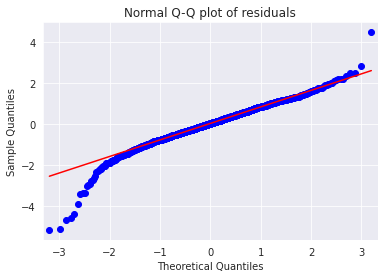

In [38]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [39]:
list(np.where(model.resid>3))

[array([522])]

In [40]:
list(np.where(model.resid<-3))

[array([ 116,  182,  183,  184,  190,  191,  392,  401,  600, 1434])]

Residual plot for Homoscedasticity

In [41]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()  

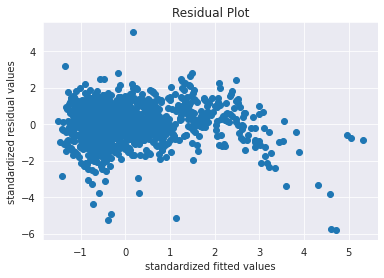

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

Residual vs Regressors

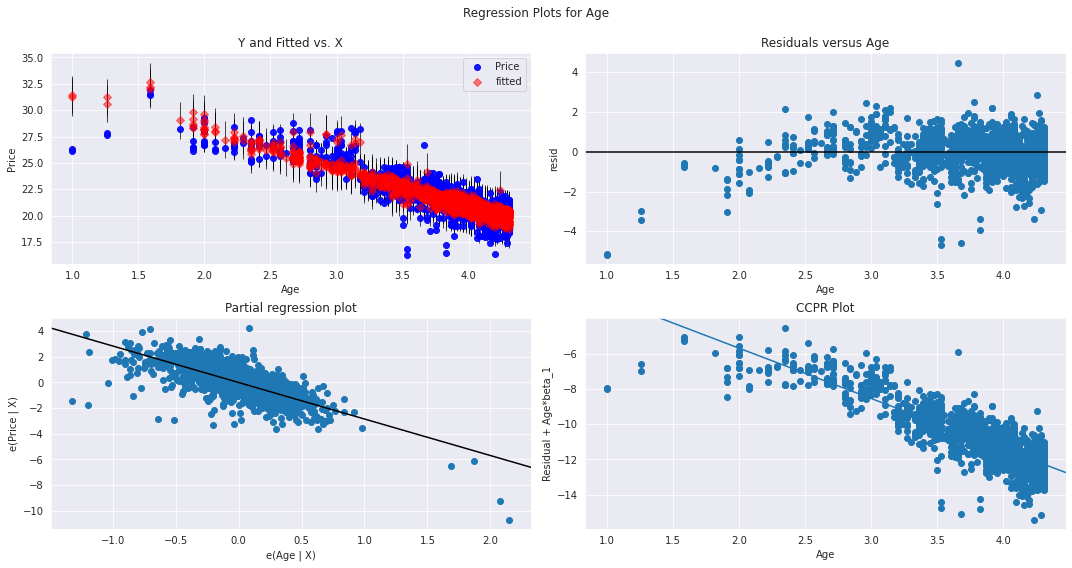

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

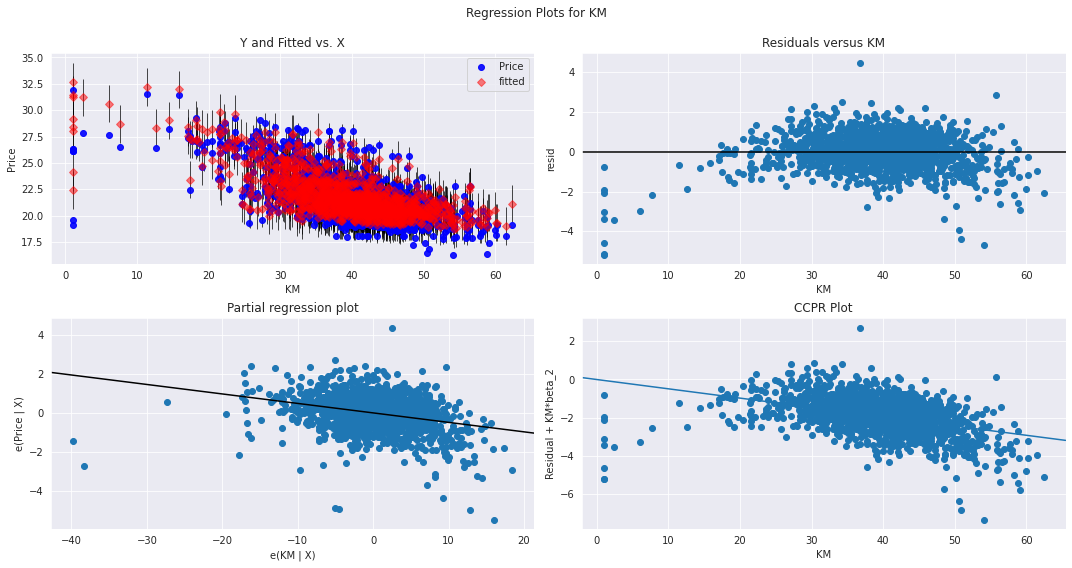

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

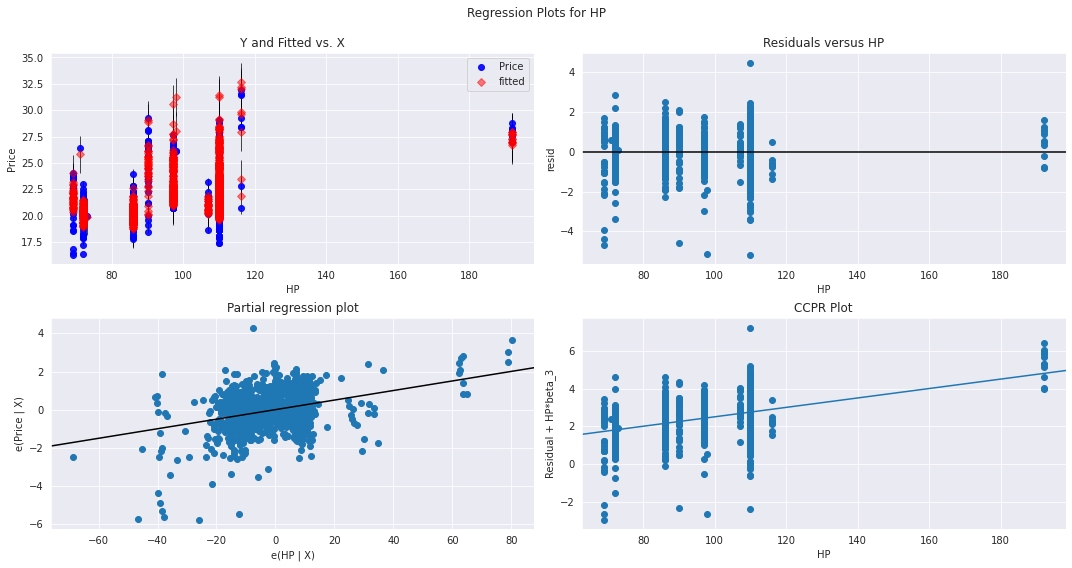

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

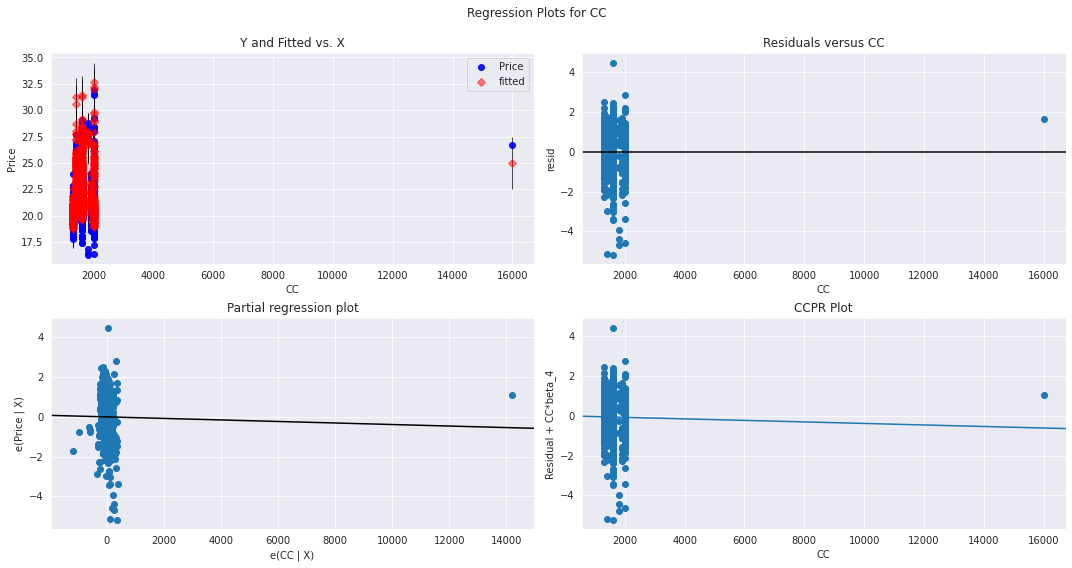

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

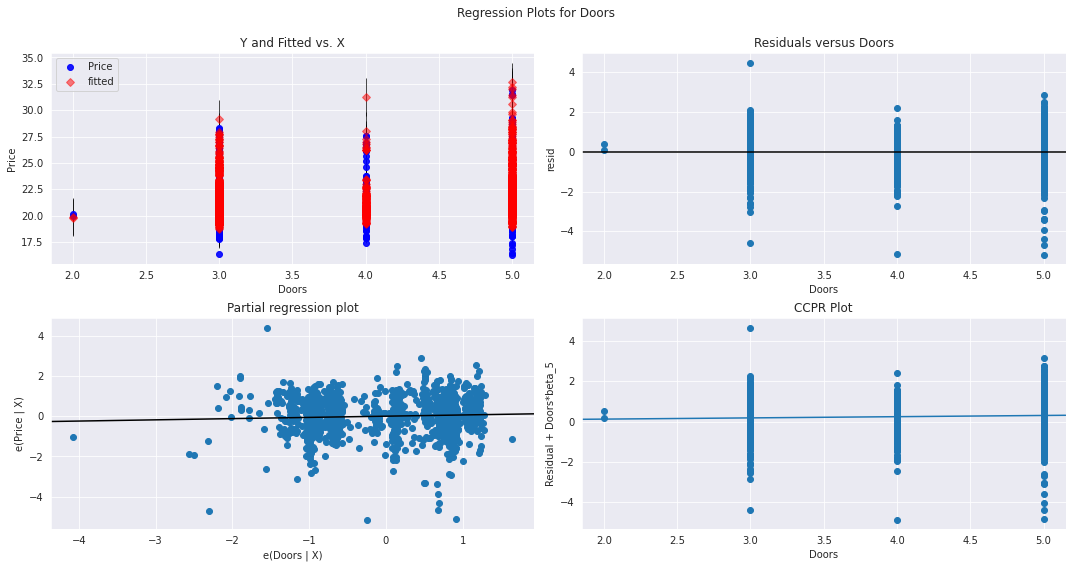

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

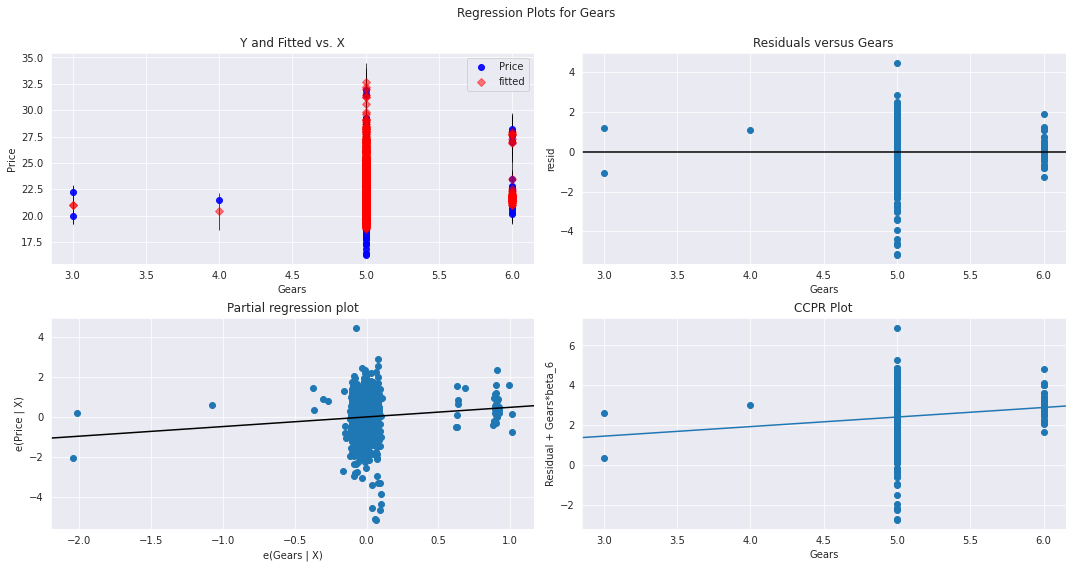

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

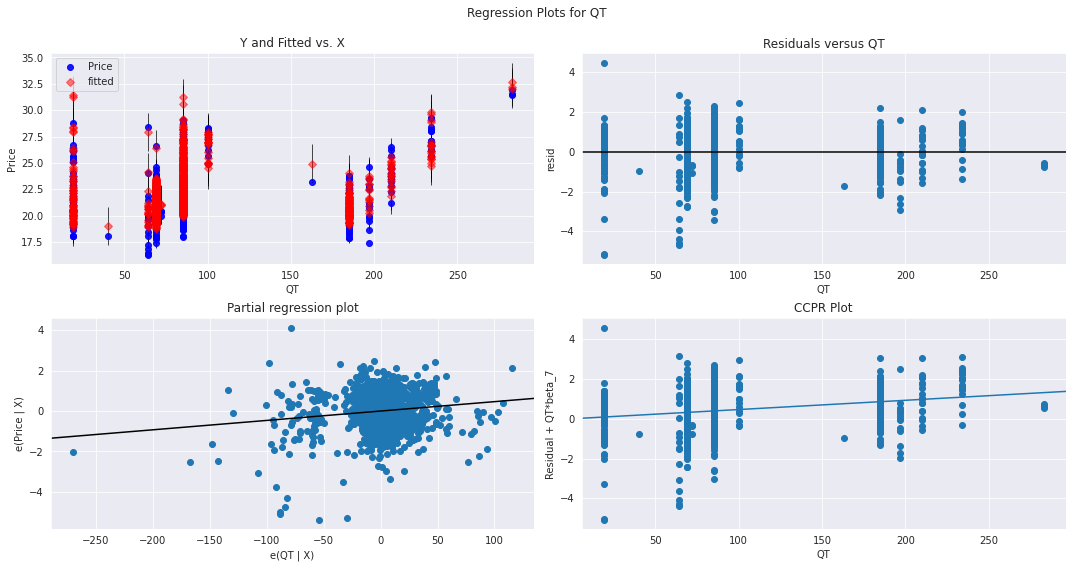

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

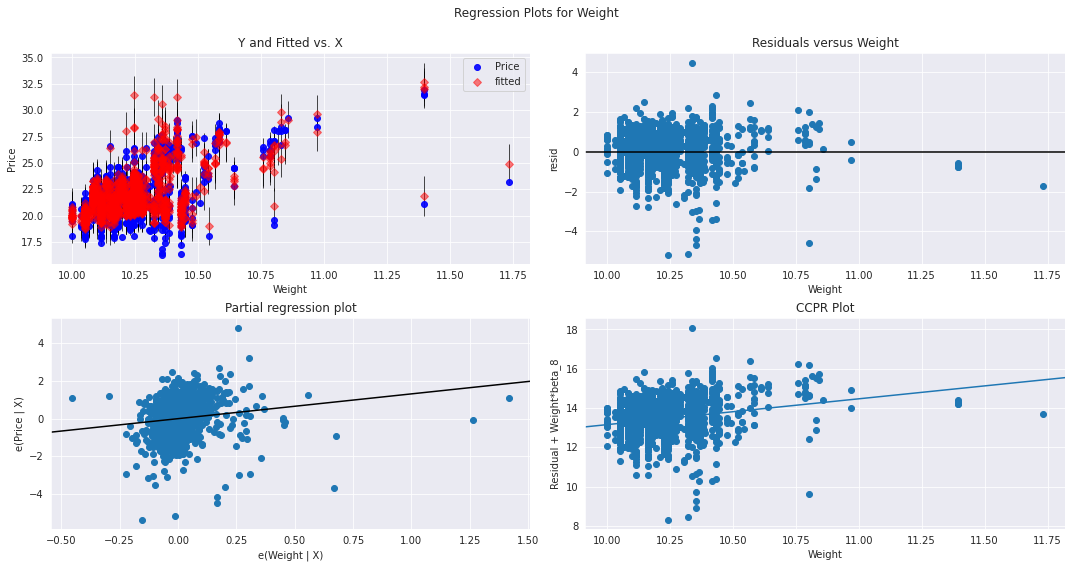

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

Model Deletion Diagnostics (checking Outliers or Influencers)
Two Techniques : 1. Cook's Distance & 2. Leverage value

In [46]:
# cook's distance
# Log transformation model
model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance

In [47]:
print((c,_))

(array([2.53610179e-03, 1.23438869e-03, 1.50125522e-03, ...,
       5.13675179e-05, 2.14016483e-03, 7.66803310e-02]), array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
       0.99987874]))


In [48]:
summary_cooks=model_influence.summary_frame()
summary_cooks

,dfb_Intercept,dfb_Age,dfb_KM,dfb_HP,dfb_CC,dfb_Doors,dfb_Gears,dfb_QT,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.021950,0.035098,0.008853,-0.007759,-0.007068,0.058720,0.015336,-0.087635,0.014615,0.002536,-1.506777,0.009953,-0.151079,-1.507450,-0.151147
1,-0.016545,0.041857,-0.021393,-0.008823,-0.003670,0.040848,0.012205,-0.053071,0.011013,0.001234,-1.030902,0.010345,-0.105402,-1.030924,-0.105404
2,-0.014881,0.018366,0.016799,-0.004850,-0.005632,0.044995,0.011278,-0.069518,0.009590,0.001501,-1.158729,0.009963,-0.116238,-1.158868,-0.116252
3,-0.001974,0.002740,0.001976,-0.000915,-0.000800,0.007229,0.001878,-0.010808,0.001166,0.000037,-0.185016,0.009585,-0.018201,-0.184953,-0.018195
4,-0.000780,-0.003774,0.019550,-0.001204,-0.002404,0.025909,0.006064,-0.038651,-0.001599,0.000468,-0.647215,0.009956,-0.064903,-0.647083,-0.064889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-0.000313,-0.060938,0.086967,0.040331,0.007449,0.024553,-0.003563,-0.011316,-0.002426,0.001284,-1.248260,0.007362,-0.107503,-1.248505,-0.107524
1431,0.012476,0.095538,-0.138454,-0.055814,-0.007994,-0.031500,0.006006,0.028593,-0.009680,0.003122,1.829598,0.008323,0.167619,1.831106,0.167757
1432,-0.001639,-0.012190,0.017999,0.007051,0.000938,0.003884,-0.000807,-0.003785,0.001292,0.000051,-0.227473,0.008855,-0.021501,-0.227397,-0.021494
1433,-0.011606,-0.077269,0.115963,0.045825,0.006011,0.025227,-0.005246,-0.024560,0.009227,0.002140,-1.478664,0.008733,-0.138786,-1.479280,-0.138844


<ipython-input-49-90027de09eb6>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toy)),np.round(c,3))


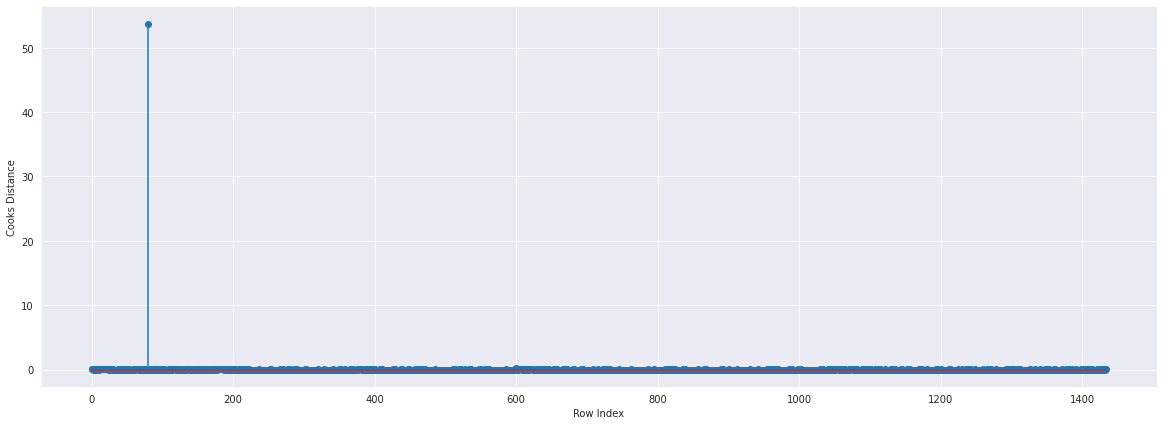

In [49]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toy)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 53.73662713367957)

In [51]:
# Log transformation model
model_influence=log_transformed_model.get_influence()
(c, _) = model_influence.cooks_distance

In [52]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 46.556151983967354)

In [53]:
# Cube root transformation model
model_influence=cbrt_transformed_model.get_influence()
(c, _) = model_influence.cooks_distance

In [55]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 53.73662713367957)

In [56]:
# Square root transformation
model_influence=sqrt_transformed_model.get_influence()
(c, _) = model_influence.cooks_distance

In [57]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 53.19868403780094)

In [58]:
# Standard scaler tranformation
model_influence=standard_scaler_transformed_model.get_influence()
(c, _) = model_influence.cooks_distance

In [59]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 53.73662713355925)

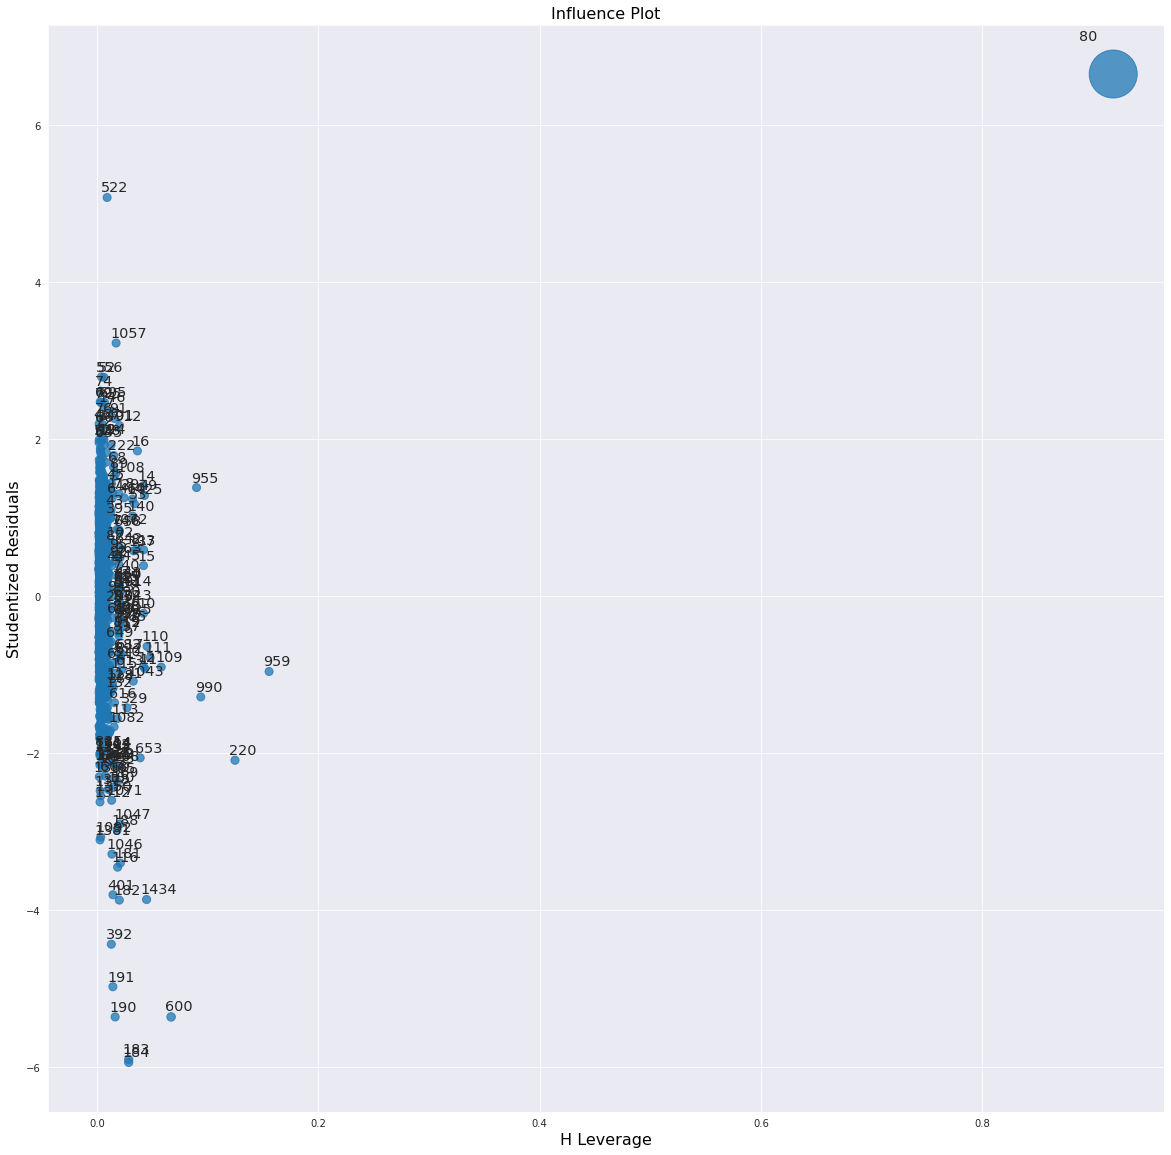

In [60]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [61]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toy.shape[1]
n=toy.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [62]:
toy[toy.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


Improving the Model

In [63]:
# Discard the data points which are outlier and reassign the row number (reset_index(drop=True))
toy_new=toy.drop(toy.index[[80]],axis=0).reset_index(drop=True)
toy_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


Model Deletion Diagnostics and Final Model

In [64]:
final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toy_new).fit()

In [ ]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toy_new).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toy_new=toy_new.drop(toy_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toy_new
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toy_new).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171205
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319988
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605557
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [ ]:
final_model.rsquared

0.9003762532318559

In [ ]:
# Model Accuracy is increased to 90%
toy_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


Model Prediction

In [ ]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [ ]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [ ]:
# Automatic Prediction of Price with 90% accurcy
pred_y=final_model.predict(toy_new)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64